In [93]:
# Importing Libraries
import numpy as np # Linear algebra -> To perform mathematical operations
import pandas as pd # Data pre-processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Statistical Graphs
import matplotlib.pyplot as plt # Visualizations
import matplotlib.image as mpimg

import warnings # Warnings do not cause a program to terminate, Errors do
warnings.filterwarnings("ignore")

In [3]:
# Importing Dataset
df_train=pd.read_csv("/content/train.csv") # Train Dataset
df_test=pd.read_csv("/content/test.csv") # Test Dataset
df_train

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [4]:
df_train.tail()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [5]:
# Information about the Training Dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [6]:
# Information about the Testing Dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        9465 non-null   object 
 1   Patient Age                                       9465 non-null   int64  
 2   Genes in mother's side                            9465 non-null   object 
 3   Inherited from father                             8914 non-null   object 
 4   Maternal gene                                     5742 non-null   object 
 5   Paternal gene                                     9465 non-null   object 
 6   Blood cell count (mcL)                            9465 non-null   float64
 7   Patient First Name                                9465 non-null   object 
 8   Family Name                                       148 non-null    object 
 9   Father's name      

In [7]:
df_train["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [8]:
df_train["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

In [9]:
# Total Columns
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [10]:
# Pre-Processing Starts
# Dropping unwanted columns
df_train.drop("Patient Id",axis=1,inplace=True)
df_train.drop("Family Name",axis=1,inplace=True)
df_train.drop("Patient First Name",axis=1,inplace=True)
df_train.drop("Father's name",axis=1,inplace=True)
df_train.drop("Institute Name",axis=1,inplace=True)
df_train.drop("Location of Institute",axis=1,inplace=True)
df_train.drop("Place of birth",axis=1,inplace=True)

In [11]:
# Checking total null values
df_train.isna().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Parental consent                                    2125
Follow-up                      

In [12]:
df_train["Patient Age"]

0         2.0
1         4.0
2         6.0
3        12.0
4        11.0
         ... 
22078     4.0
22079     8.0
22080     8.0
22081     7.0
22082    11.0
Name: Patient Age, Length: 22083, dtype: float64

In [13]:
# Filling Null values with mode
df_train["Patient Age"].fillna(str(df_train["Patient Age"].mode().values[0]),inplace=True)
df_train["Inherited from father"].fillna(str(df_train["Inherited from father"].mode().values[0]),inplace=True)
df_train["Maternal gene"].fillna(str(df_train["Maternal gene"].mode().values[0]),inplace=True)
df_train["Mother's age"].fillna(str(df_train["Mother's age"].mode().values[0]),inplace=True)
df_train["Father's age"].fillna(str(df_train["Father's age"].mode().values[0]),inplace=True)
df_train["Respiratory Rate (breaths/min)"].fillna(str(df_train["Respiratory Rate (breaths/min)"].mode().values[0]),inplace=True)
df_train["Heart Rate (rates/min"].fillna(str(df_train["Heart Rate (rates/min"].mode().values[0]),inplace=True)
df_train["Test 1"].fillna(str(df_train["Test 1"].mode().values[0]),inplace=True)
df_train["Test 2"].fillna(str(df_train["Test 2"].mode().values[0]),inplace=True)
df_train["Test 3"].fillna(str(df_train["Test 3"].mode().values[0]),inplace=True)
df_train["Test 4"].fillna(str(df_train["Test 4"].mode().values[0]),inplace=True)
df_train["Test 5"].fillna(str(df_train["Test 5"].mode().values[0]),inplace=True)
df_train["Parental consent"].fillna(str(df_train["Parental consent"].mode().values[0]),inplace=True)
df_train["Follow-up"].fillna(str(df_train["Follow-up"].mode().values[0]),inplace=True)
df_train["Gender"].fillna(str(df_train["Gender"].mode().values[0]),inplace=True)
df_train["Birth asphyxia"].fillna(str(df_train["Birth asphyxia"].mode().values[0]),inplace=True)
df_train["Autopsy shows birth defect (if applicable)"].fillna(str(df_train["Autopsy shows birth defect (if applicable)"].mode().values[0]),inplace=True)
df_train["Folic acid details (peri-conceptional)"].fillna(str(df_train["Folic acid details (peri-conceptional)"].mode().values[0]),inplace=True)
df_train["H/O serious maternal illness"].fillna(str(df_train["H/O serious maternal illness"].mode().values[0]),inplace=True)
df_train["H/O radiation exposure (x-ray)"].fillna(str(df_train["H/O radiation exposure (x-ray)"].mode().values[0]),inplace=True)
df_train["H/O substance abuse"].fillna(str(df_train["H/O substance abuse"].mode().values[0]),inplace=True)
df_train["Assisted conception IVF/ART"].fillna(str(df_train["Assisted conception IVF/ART"].mode().values[0]),inplace=True)
df_train["History of anomalies in previous pregnancies"].fillna(str(df_train["History of anomalies in previous pregnancies"].mode().values[0]),inplace=True)
df_train["No. of previous abortion"].fillna(str(df_train["No. of previous abortion"].mode().values[0]),inplace=True)
df_train["Birth defects"].fillna(str(df_train["Birth defects"].mode().values[0]),inplace=True)
df_train["White Blood cell count (thousand per microliter)"].fillna(str(df_train["White Blood cell count (thousand per microliter)"].mode().values[0]),inplace=True)
df_train["Blood test result"].fillna(str(df_train["Blood test result"].mode().values[0]),inplace=True)
df_train["Symptom 1"].fillna(str(df_train["Symptom 1"].mode().values[0]),inplace=True)
df_train["Symptom 2"].fillna(str(df_train["Symptom 2"].mode().values[0]),inplace=True)
df_train["Symptom 3"].fillna(str(df_train["Symptom 3"].mode().values[0]),inplace=True)
df_train["Symptom 4"].fillna(str(df_train["Symptom 4"].mode().values[0]),inplace=True)
df_train["Symptom 5"].fillna(str(df_train["Symptom 5"].mode().values[0]),inplace=True)
df_train["Genetic Disorder"].fillna(str(df_train["Genetic Disorder"].mode().values[0]),inplace=True)
df_train["Disorder Subclass"].fillna(str(df_train["Disorder Subclass"].mode().values[0]),inplace=True)

In [14]:
# Checking if any null value is present
df_train.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Parental consent                                    0
Follow-up                                           0
Gender                      

In [15]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             22083 non-null  object 
 3   Maternal gene                                     22083 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [17]:
# Optional Column name change
# for column in df_train:
#     columnSeriesObj = df_train[column]
#     print('Column Name : ', column)
#     print('Column Contents : ', columnSeriesObj.values)
#     print("---------------------------------------------")

In [18]:
df_train.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Density'>

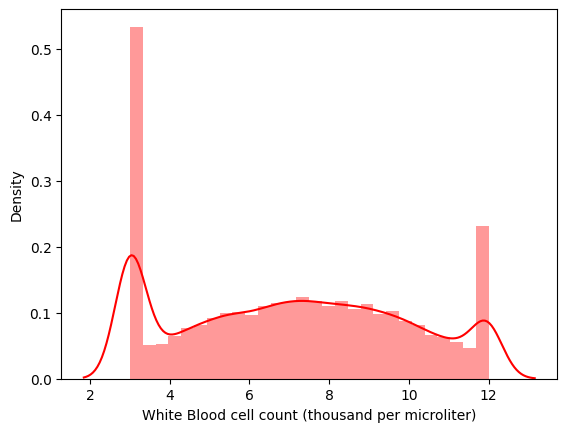

In [19]:
# Plotting
sns.distplot(df_train["White Blood cell count (thousand per microliter)"],color = "red")

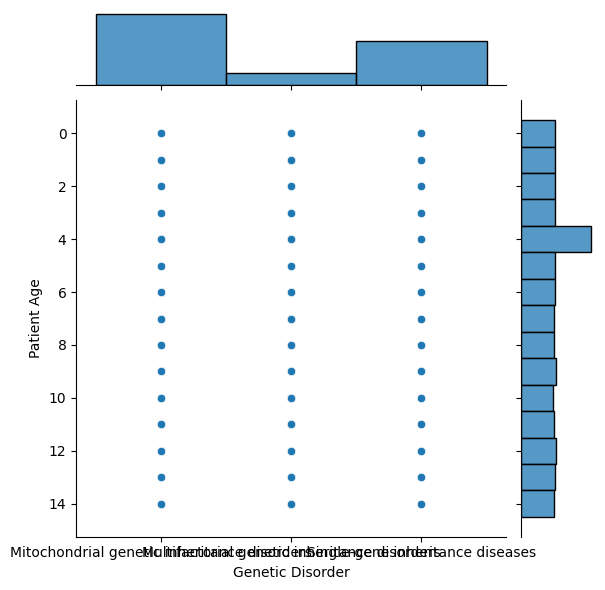

In [20]:
sns.jointplot(x="Genetic Disorder",y="Patient Age",data=df_train)

<Axes: xlabel='Patient Age', ylabel='White Blood cell count (thousand per microliter)'>

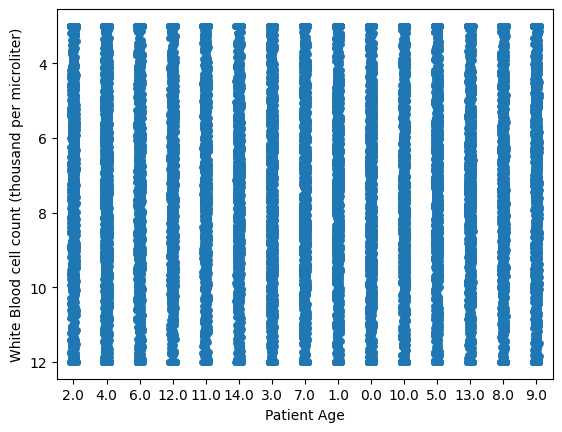

In [21]:
sns.stripplot(x="Patient Age",y="White Blood cell count (thousand per microliter)",data=df_train,jitter=True)

<Axes: >

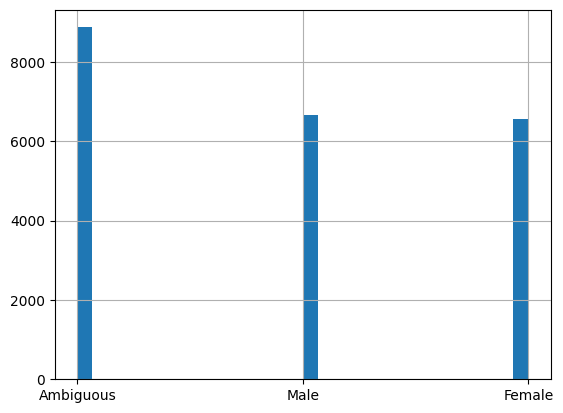

In [22]:
df_train["Gender"].hist(bins=30)

In [26]:
df_train['Gender'].value_counts()

Ambiguous    8868
Male         6666
Female       6549
Name: Gender, dtype: int64

In [27]:
# Changing from yes or no[Categorical] to numerical(1 or 0)
df_train["Genes in mother's side"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Genes in mother's side"]]
df_train["Inherited from father"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Inherited from father"]]
df_train["Maternal gene"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Maternal gene"]]
df_train["Paternal gene"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Paternal gene"]]
df_train["Parental consent"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Parental consent"]]
df_train["Birth asphyxia"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Birth asphyxia"]]
df_train["Folic acid details (peri-conceptional)"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Folic acid details (peri-conceptional)"]]
df_train["H/O radiation exposure (x-ray)"]=[1 if i.strip()== "Yes" else 0 for i in df_train["H/O radiation exposure (x-ray)"]]
df_train["H/O substance abuse"]=[1 if i.strip()== "Yes" else 0 for i in df_train["H/O substance abuse"]]
df_train["Assisted conception IVF/ART"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Assisted conception IVF/ART"]]
df_train["History of anomalies in previous pregnancies"]=[1 if i.strip()== "Yes" else 0 for i in df_train["History of anomalies in previous pregnancies"]]
df_train["H/O serious maternal illness"]=[1 if i.strip()=="Yes" else 0 for i in df_train["H/O serious maternal illness"]]

In [28]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,1,1,0,0,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,1,0,0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,1,0,1,0,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,1,0,1,1,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [29]:
# Check if you changed the column name
# for column in df_train:
#     columnSeriesObj = df_train[column]
#     print('Column Name : ', column)
#     print('Column Contents : ', columnSeriesObj.values)
#     print("---------------------------------------------")

In [30]:
# Checking the unique elements in Categorical Columns
print("Status: ",df_train["Status"].unique())
print("Respiratory Rate (breaths/min): ",df_train["Respiratory Rate (breaths/min)"].unique())
print("Heart Rate (rates/min: ",df_train["Heart Rate (rates/min"].unique())
print("Follow-up: ",df_train["Follow-up"].unique())
print("Gender: ",df_train["Gender"].unique())
print("Autopsy shows birth defect (if applicable): ",df_train["Autopsy shows birth defect (if applicable)"].unique())
print("Birth defects: ",df_train["Birth defects"].unique())
print("Blood test result: ",df_train["Blood test result"].unique())
print("Genetic Disorder: ",df_train["Genetic Disorder"].unique())
print("Disorder Subclass: ",df_train["Disorder Subclass"].unique())


Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect (if applicable):  ['Not applicable' 'None' 'No' 'Yes']
Birth defects:  ['Singular' 'Multiple']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [31]:
# plots
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,1,1,0,0,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,1,0,0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,1,0,1,0,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,1,0,1,1,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [32]:
# Changing Categorical Values to Numerical Values
#Alive':1 'Deceased:0'
df_train["Status"]=[1 if i.strip()== "Alive" else 0 for i in df_train["Status"]]
#Normal (30-60):1' 'Tachypnea:0
df_train["Respiratory Rate (breaths/min)"]=[1 if i.strip()== "Normal (30-60)" else 0 for i in df_train["Respiratory Rate (breaths/min)"]]
#Normal:1' 'Tachycardia:0
df_train["Heart Rate (rates/min"]=[1 if i.strip()== "Normal" else 0 for i in df_train["Heart Rate (rates/min"]]
#High:1, Low:0
df_train["Follow-up"]=[1 if i.strip()== "High" else 0 for i in df_train["Follow-up"]]
#['Singular' 'Multiple']
df_train["Birth defects"]=[1 if i.strip()== "Singular" else 0 for i in df_train["Birth defects"]]
#1: male 0: female 2: ambiguous
df_train["Gender"]=[1 if i.strip()== "Male" else 0 if i.strip() == "Female" else 2 for i in df_train["Gender"]]
#Not applicable:3' 'None:2' 'No:0' 'Yes:1'
df_train["Autopsy shows birth defect (if applicable)"]=[1 if i.strip()== "Yes" else 0 if i.strip() == "No" else 2 if i.strip()=="None" else 3 for i in df_train["Autopsy shows birth defect (if applicable)"]]
#'slightly abnormal':1, 'normal':0, 'inconclusive':2 'abnormal:3']
df_train["Blood test result"]=[1 if i.strip()== "slightly abnormal" else 0 if i.strip() == "normal" else 2 if i.strip()=="inconclusive" else 3 for i in df_train["Blood test result"]]
#'Mitochondrial genetic inheritance disorders':1,'Multifactorial genetic inheritance disorders':0'Single-gene inheritance diseases:2'
df_train["Genetic Disorder"]=[1 if i.strip()== "Mitochondrial genetic inheritance disorders" else 0 if i.strip() == "Multifactorial genetic inheritance disorders" else 2 for i in df_train["Genetic Disorder"]]
#Leber's hereditary optic neuropathy:1
#Cystic fibrosis:0
#Diabetes:2
#Leigh syndrome:3
#Cancer:4
#Tay-Sachs:5
#Hemochromatosis:6
#Mitochondrial myopathy:7
#Alzheimer's:8
df_train["Disorder Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy"
                                else 0 if i.strip() == "Cystic fibrosis"
                               else 2 if i.strip()=="Diabetes"
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in df_train["Disorder Subclass"]]
df_train["total symptom"]=(df_train["Symptom 1"]+df_train["Symptom 2"]+df_train["Symptom 3"]+df_train["Symptom 4"]+df_train["Symptom 5"]) / 5
df_train.drop(["Symptom 1","Symptom 2","Symptom 3","Symptom 4","Symptom 5"],axis=1,inplace=True)


TypeError: ignored

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  int64  
 2   Inherited from father                             22083 non-null  int64  
 3   Maternal gene                                     22083 non-null  int64  
 4   Paternal gene                                     22083 non-null  int64  
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  int64  
 9   Respiratory Rate 

In [34]:
# Changing the datatype to float
df_train = df_train.apply(pd.to_numeric,downcast="float")

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

In [36]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,1.0,9.857562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,0.0,5.522560,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,1.0,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,1.0,7.919321,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,0.0,4.098210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


<Axes: >

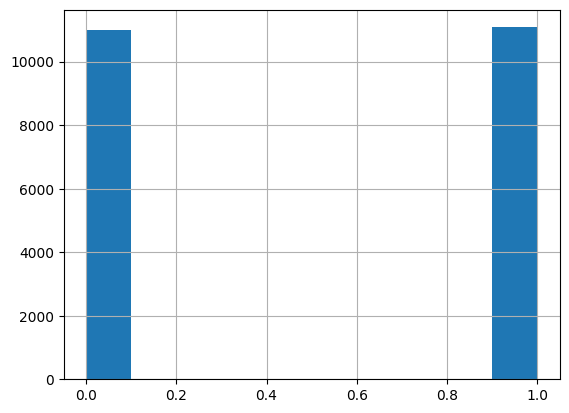

In [42]:
df_train["Status"].hist()

In [43]:
df_train.Status.value_counts()

1.0    11083
0.0    11000
Name: Status, dtype: int64

<Axes: xlabel='Birth defects'>

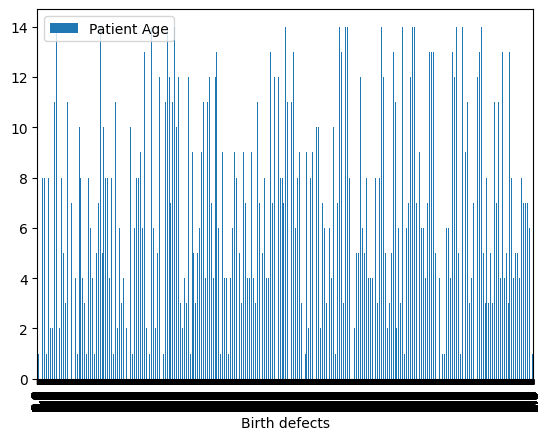

In [ ]:
df_train.plot.bar(y="Patient Age",x="Birth defects")

<Axes: xlabel='Gender', ylabel='Birth asphyxia'>

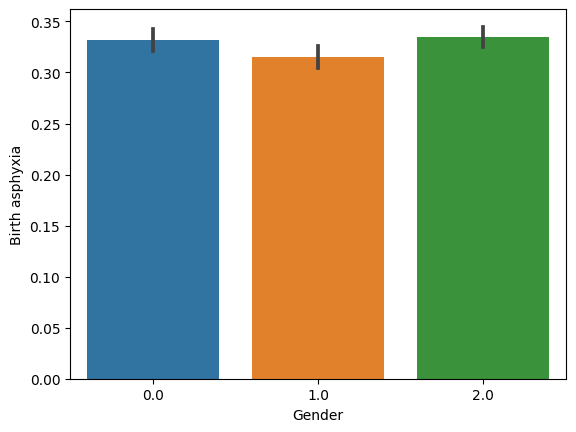

In [46]:
sns.barplot(x="Gender",y="Birth asphyxia",data=df_train)

<Axes: xlabel='Autopsy shows birth defect (if applicable)', ylabel='Disorder Subclass'>

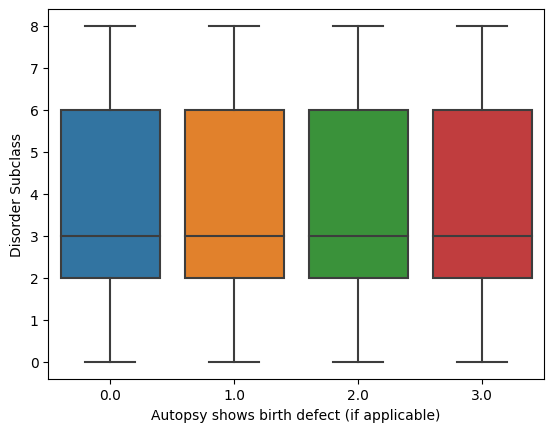

In [50]:
sns.boxplot(x="Autopsy shows birth defect (if applicable)",y="Disorder Subclass",data=df_train)

<Axes: xlabel='No. of previous abortion', ylabel='Density'>

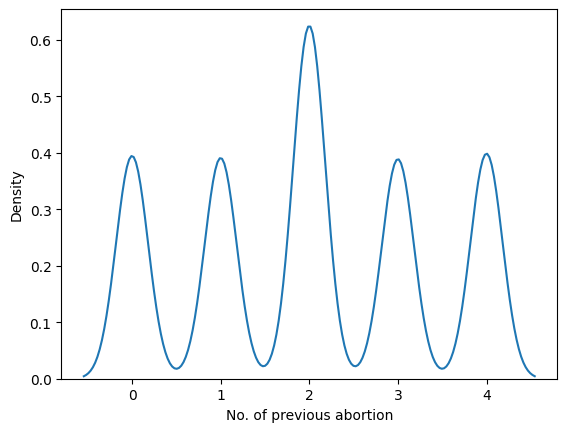

In [51]:
sns.kdeplot(df_train["No. of previous abortion"],palette="dark")

<Axes: xlabel='Disorder Subclass', ylabel='Density'>

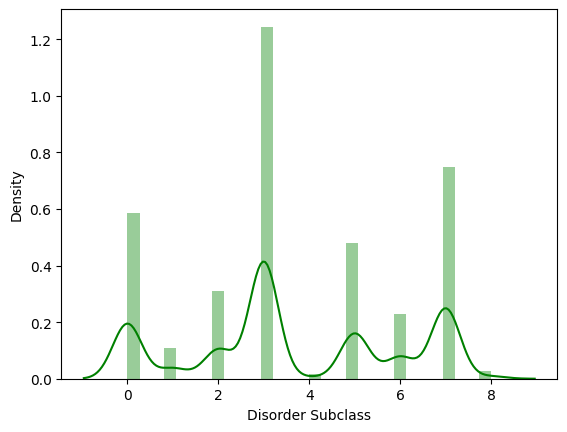

In [52]:
# Distplot
sns.distplot(df_train['Disorder Subclass'],color="green",bins=30)

<Figure size 1200x600 with 0 Axes>

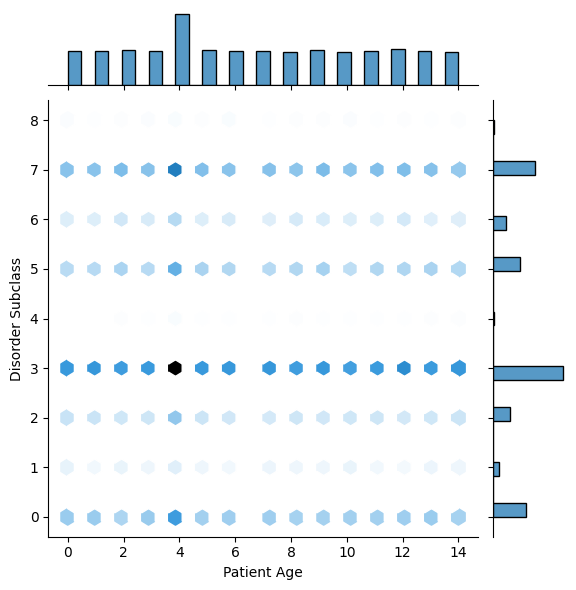

In [54]:
#JointPlot
plt.figure(figsize=(12,6))
sns.jointplot(x=df_train["Patient Age"],y=df_train['Disorder Subclass'],kind="hex")

In [55]:
df_train.corr()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Age,1.000000,0.003452,-0.008275,0.001492,-0.004422,0.010155,0.008203,-0.000949,0.007764,-0.011186,...,0.002748,-0.005237,0.004462,0.000006,0.007062,-0.019291,-0.006475,-0.010584,0.005872,0.003171
Genes in mother's side,0.003452,1.000000,0.008960,0.089605,-0.007389,-0.002403,0.010247,0.000520,-0.000221,-0.001917,...,-0.002398,0.001717,0.009318,-0.000321,0.001120,0.006801,0.011139,0.013832,-0.068655,-0.135966
Inherited from father,-0.008275,0.008960,1.000000,0.009222,0.095115,-0.007677,0.006349,0.003769,-0.012293,0.011765,...,-0.012021,0.002444,0.008831,-0.004460,-0.001561,0.008348,0.006371,0.020789,-0.067767,-0.125198
Maternal gene,0.001492,0.089605,0.009222,1.000000,0.011829,0.008119,-0.004247,-0.022747,0.003566,-0.003921,...,0.013352,0.000213,0.004294,0.009778,0.008800,0.015639,0.006853,0.011676,-0.056601,-0.121280
Paternal gene,-0.004422,-0.007389,0.095115,0.011829,1.000000,-0.003494,-0.001070,0.000636,0.013799,0.000572,...,0.002223,0.005593,0.010374,0.010270,0.000180,-0.002390,0.011039,0.006553,-0.049738,-0.114605
Blood cell count (mcL),0.010155,-0.002403,-0.007677,0.008119,-0.003494,1.000000,-0.001129,-0.003498,0.003149,0.002200,...,0.011251,-0.004076,-0.004756,0.002585,-0.005347,0.003888,0.004455,0.002684,0.004781,-0.009202
Mother's age,0.008203,0.010247,0.006349,-0.004247,-0.001070,-0.001129,1.000000,0.059002,-0.001519,-0.008097,...,-0.005871,0.028218,-0.003693,-0.020455,-0.021779,-0.003388,0.010563,0.024325,0.008263,-0.002519
Father's age,-0.000949,0.000520,0.003769,-0.022747,0.000636,-0.003498,0.059002,1.000000,-0.000087,-0.030954,...,-0.016907,0.023952,0.008176,-0.018103,-0.026051,-0.007673,0.016978,0.031040,0.009774,0.006047
Status,0.007764,-0.000221,-0.012293,0.003566,0.013799,0.003149,-0.001519,-0.000087,1.000000,0.008206,...,0.001038,-0.001910,-0.001479,0.010473,0.001242,0.006958,0.003699,0.001598,0.003983,-0.013107
Respiratory Rate (breaths/min),-0.011186,-0.001917,0.011765,-0.003921,0.000572,0.002200,-0.008097,-0.030954,0.008206,1.000000,...,0.009044,-0.011120,-0.000738,0.013919,-0.002498,-0.002670,-0.004351,0.001701,-0.010160,0.004364


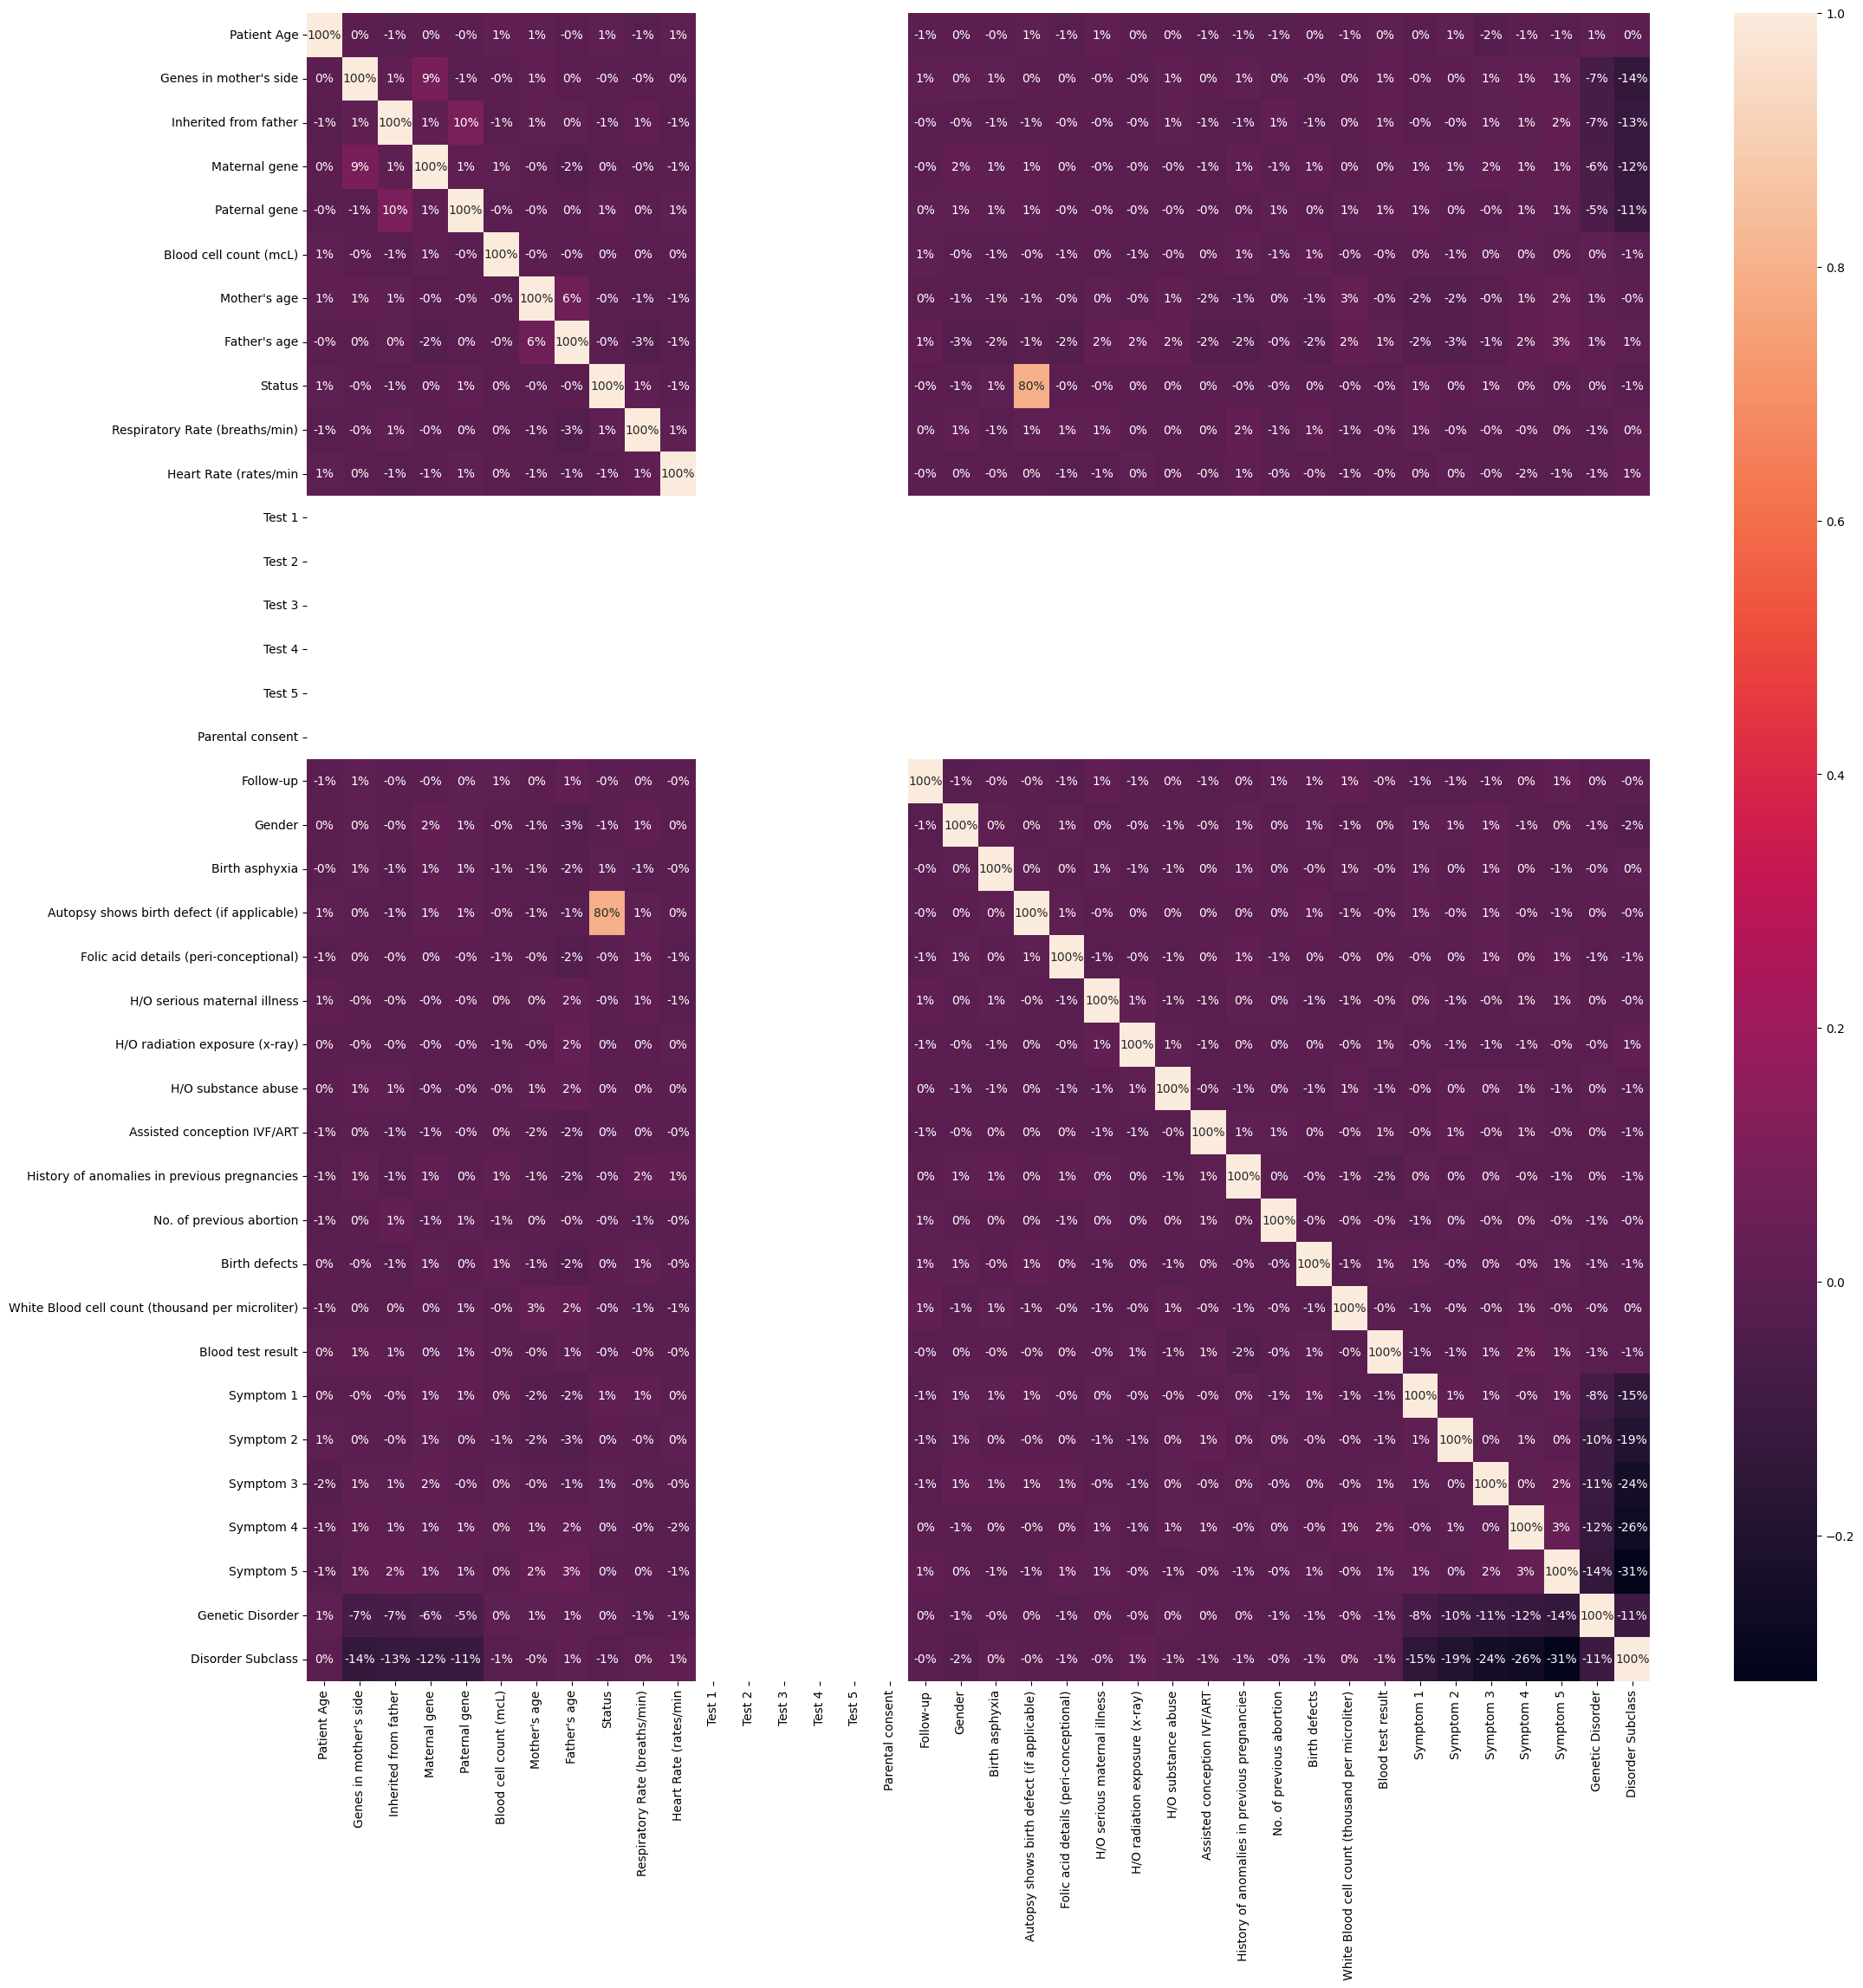

In [56]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.iloc[:,0:39].corr(),annot=True,fmt=".0%")
plt.show()

In [58]:
df_train.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [59]:
df_test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [57]:
df_train['Genetic Disorder'].head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Genetic Disorder, dtype: float32

KNN

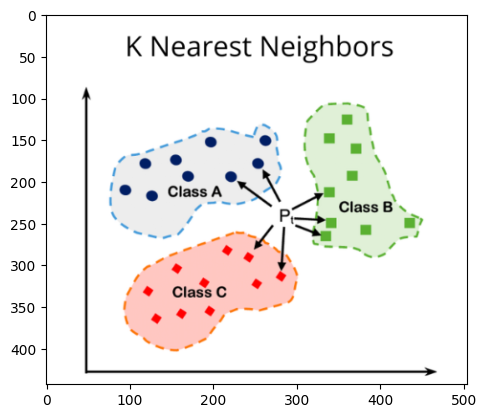

In [100]:
img = mpimg.imread('knn.png')
imgplot = plt.imshow(img)
plt.show()

In [76]:
# train test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x,y = df_train.loc[:,df_train.columns != 'Status'], df_train.loc[:,'Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train) # 	Learn and estimate the parameters of the transformation
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.7550373556712701


In [79]:
# train test split
x,y = df_train.loc[:,df_train.columns != 'Genetic Disorder'], df_train.loc[:,'Genetic Disorder']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.6319601629696695


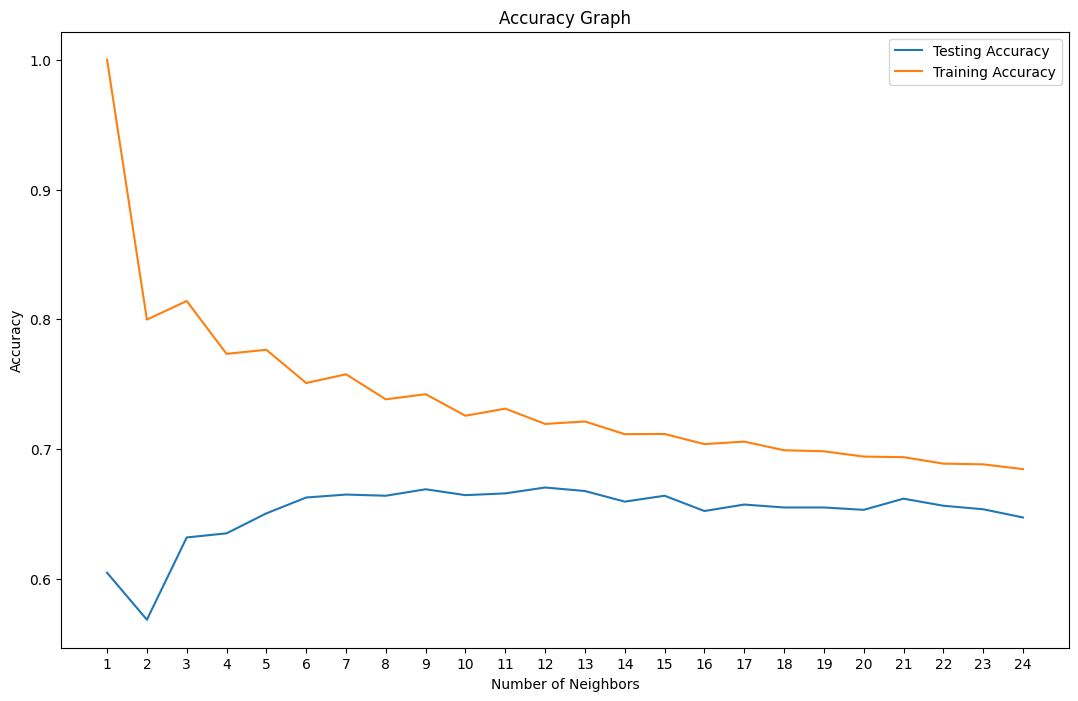

Best accuracy is 0.6704391127206881 with K = 12


In [80]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Random Forest

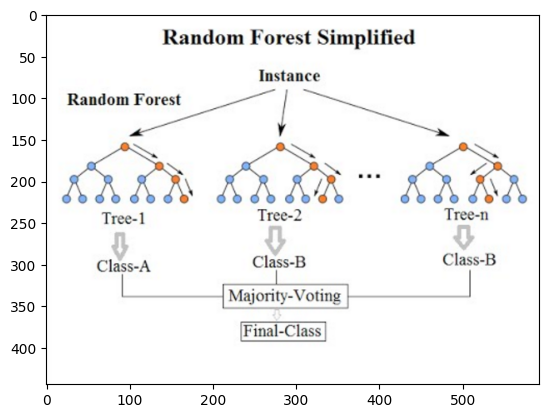

<Figure size 1200x800 with 0 Axes>

In [96]:
img = mpimg.imread('Random Forest.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(12,8))
plt.show()

In [67]:

x, y = df_train.loc[:, df_train.columns != 'Genetic Disorder'], df_train.loc[:, 'Genetic Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=1)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=120, random_state=1)  # You can adjust n_estimators as needed

rf.fit(x_train, y_train)

prediction = rf.predict(x_test)
accuracy = rf.score(x_test, y_test)
print('Random Forest accuracy for predicting Disorder Subclass is:', accuracy)

Random Forest accuracy for predicting Disorder Subclass is: 0.8584932359766797


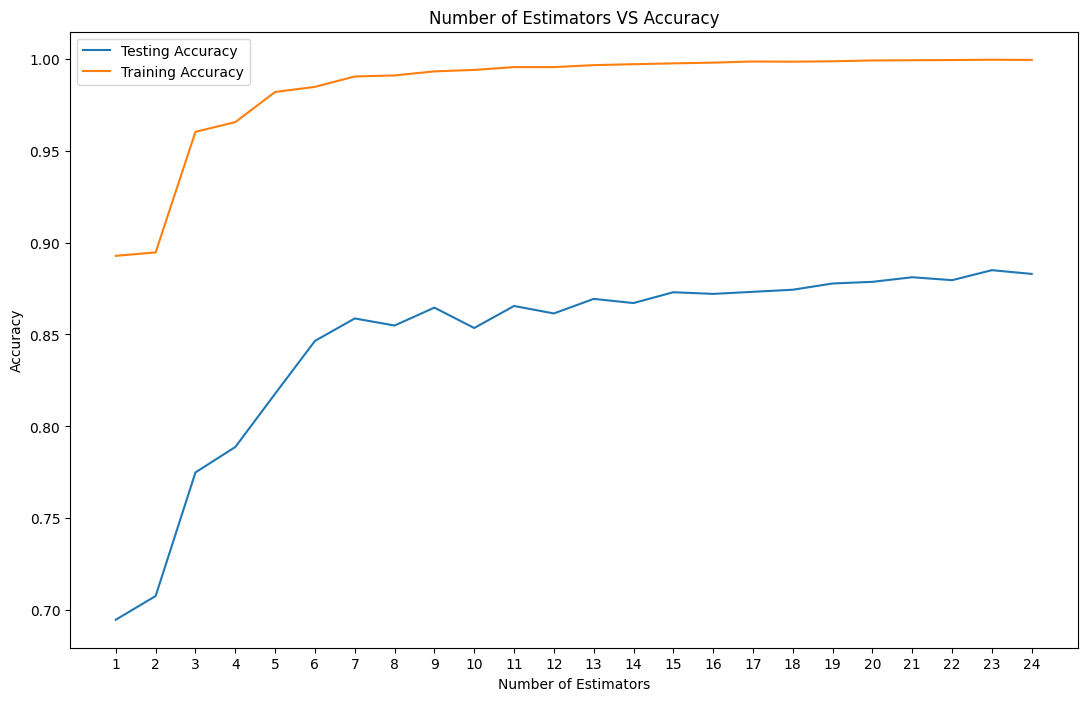

Best accuracy is 0.8849898120896537 with n_estimators = 23


In [74]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

n_estimators = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for n in n_estimators:
    # Create a Random Forest classifier with 'n' estimators
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(x_train, y_train)

    # Train accuracy
    train_accuracy.append(rf.score(x_train, y_train))

    # Test accuracy
    test_accuracy.append(rf.score(x_test, y_test))

# Plot
plt.figure(figsize=[13, 8])
plt.plot(n_estimators, test_accuracy, label='Testing Accuracy')
plt.plot(n_estimators, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('Number of Estimators VS Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators)
plt.savefig('rf_graph.png')
plt.show()

best_accuracy = max(test_accuracy)
best_n_estimators = n_estimators[test_accuracy.index(best_accuracy)]

print("Best accuracy is {} with n_estimators = {}".format(best_accuracy, best_n_estimators))


Extra Tree Classifier

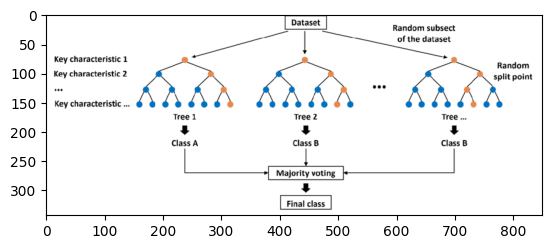

In [98]:
img = mpimg.imread('Extra Tree Classifier.png')
plt.imshow(img)
# plt.figure(figsize=(14,12))
plt.show()

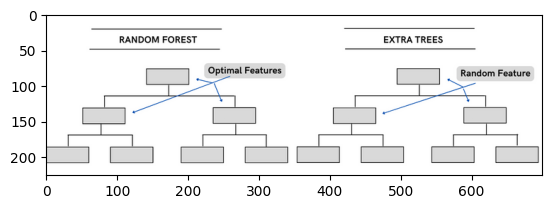

In [99]:
img = mpimg.imread('Extra - Random.png')
plt.imshow(img)
# plt.figure(figsize=(14,12))
plt.show()

In [73]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#  Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x, y = df_train.loc[:, df_train.columns != 'Genetic Disorder'], df_train.loc[:, 'Genetic Disorder']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)


extra_trees_classifier.fit(x_train,y_train)


y_pred = extra_trees_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8822730359972832


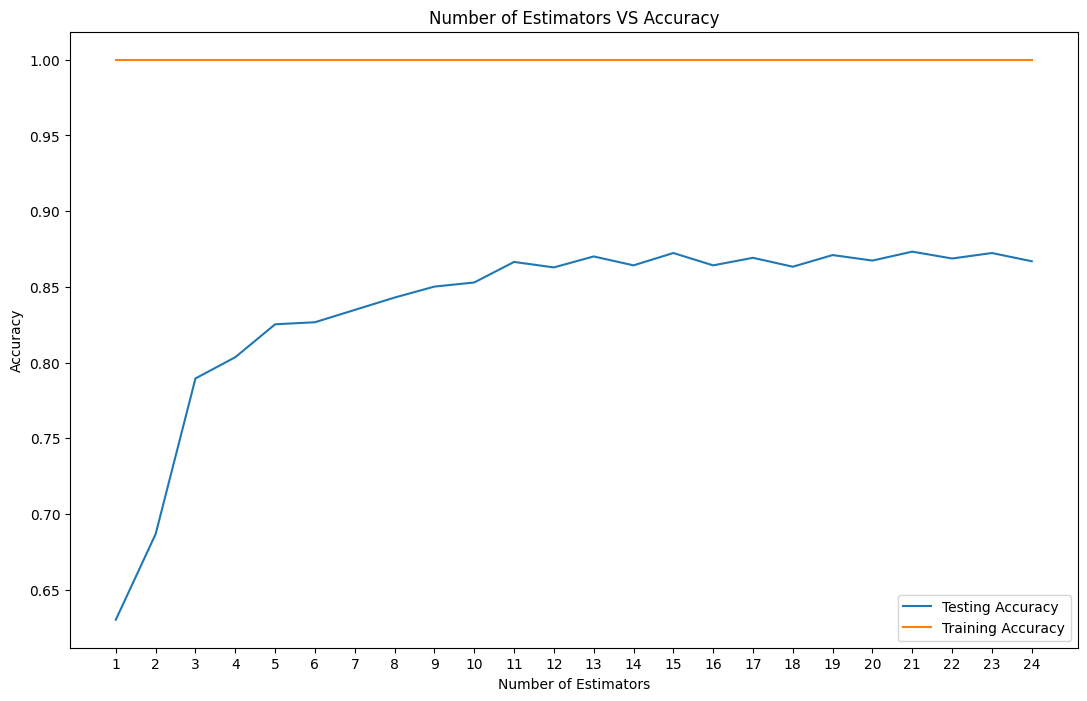

Best accuracy is 0.87324581258488 with n_estimators = 21


In [81]:


n_estimators = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for n in n_estimators:
    # Create a Extra Trees Classifier with 'n' estimators
    rf = ExtraTreesClassifier(n_estimators=n, random_state=1)
    rf.fit(x_train, y_train)

    # Train accuracy
    train_accuracy.append(rf.score(x_train, y_train))

    # Test accuracy
    test_accuracy.append(rf.score(x_test, y_test))

# Plot
plt.figure(figsize=[13, 8])
plt.plot(n_estimators, test_accuracy, label='Testing Accuracy')
plt.plot(n_estimators, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('Number of Estimators VS Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators)
plt.savefig('rf_graph.png')
plt.show()

best_accuracy = max(test_accuracy)
best_n_estimators = n_estimators[test_accuracy.index(best_accuracy)]

print("Best accuracy is {} with n_estimators = {}".format(best_accuracy, best_n_estimators))
